<div style="background-color: #0074D9; padding: 10px;">
    <h2 style="color: white;">QUANTIUM RETAIL ANALYTICS</h2>
    <p style="color: white;">EXPLORATORY DATA ANALYSING ON CUSTOMER PURCHASE AND SPENDING BEHAVIOUR</p>
</div>


### Business problem.
* The "CATEGORY MANAGER FOR CHIPS" wishes to know to understand types of customer spending and purchasing pattern.
### Objectives
* The analystics team aim to develop insights and recommendations for the retail outlet on best ways to strategise and expand the business category.

### To achieve this;
* Import and merge the datasets
* Examine the datasets for
    * Missing values
    * Inconsistencies of data types
    * Outliers
    * Identify the numeric and categorical data and convert data types if necessary
* Define recommendations and insights on the customers category to target for expansion.

## PHASE ONE
* Import libraries
* Data importation and merging
* Data cleaning and features engineering

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from collections import Counter

In [2]:
df1 = pd.read_csv(r"C:\Users\ADACHUKWU\Downloads\QVI_purchase_behaviour.csv")

In [3]:
df1.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df1.shape

(72637, 3)

In [6]:
#Check for missing values
df1.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
#Check for duplicate values
df1.duplicated().sum()

0

In [8]:
#Numerical statistical overview of dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [9]:
#Categiorical statistical overview of the dataset
df1.describe(include=["bool", "object"])

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


### Import the customer transaction excel file.

In [11]:
df2 = pd.read_excel(r"C:\Users\ADACHUKWU\Downloads\QVI_transaction_data.xlsx")

In [12]:
df2.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
#to split the weight of each product from the "PROD_NAME"
import re

In [14]:
def split_text(text):
    match = re.match(r"^(.*?)(\d+g)$", text)
    if match:
        return match.group(1).strip(),match.group(2).strip()
    else:
        return text, ""

In [15]:
#to Apply this function to our dataframe
df2[["PRODUCT_NAME", "WEIGHT(G)"]] = df2["PROD_NAME"].apply(lambda x: pd.Series(split_text(x)))

In [16]:
#Drop "PROD_NAME" Column
df2.drop(columns=["PROD_NAME"], inplace=True)

In [17]:
df2.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT_NAME,WEIGHT(G)
0,2018-10-17,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175g
1,2019-05-14,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g
2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
3,2018-08-17,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175g
4,2018-08-18,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150g


### We have successfully split the weight from the product name for easier analysis.

In [18]:
# Checking data types.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_QTY        264836 non-null  int64         
 6   TOT_SALES       264836 non-null  float64       
 7   PRODUCT_NAME    264836 non-null  object        
 8   WEIGHT(G)       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 18.2+ MB


In [19]:
# Numerical statistics for transactional dataset.
df2.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [20]:
# Categorical Statistics from the transaction dataset
df2.describe(include=["bool", "object"])

,PRODUCT_NAME,WEIGHT(G)
count,264836,264836
unique,114,21
top,Kettle Mozzarella Basil & Pesto,175g
freq,3304,64929


## Having looked at the overview of the the two datasets, we merge them to form a single table for the exploratory data analytics.
* The datasets will be merged on "LYLTY_CARD_NBR" columns as they are a basis for commonality.

In [22]:
df = pd.merge(df1, df2, on="LYLTY_CARD_NBR", how ="inner")
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT_NAME,WEIGHT(G)
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,2,6.0,Natural Chip Compny SeaSalt,175g
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,1,2.7,Red Rock Deli Chikn&Garlic Aioli,150g
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,1,3.6,Grain Waves Sour Cream&Chives 210G,
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,1,3.0,Natural ChipCo Hony Soy Chckn,175g
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,1,1.9,WW Original Stacked Chips,160g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,2,7.2,Grain Waves Sweet Chilli,210g
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,2,9.2,Kettle Tortilla ChpsFeta&Garlic,150g
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,2,8.4,Tyrrells Crisps Lightly Salted,165g
264834,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,2,10.2,Old El Paso Salsa Dip Chnky Tom Ht,300g


### To convert "WEIGHT(G)" Column to an integer
* Replace "g" with " "
* Convert to integer using to_numeric()

In [23]:
#to replace "g" in "WEIGHT" column
df["WEIGHT(G)"] = df["WEIGHT(G)"].str.replace("g", "")

In [24]:
## to convert to integer
df['WEIGHT(G)'] = pd.to_numeric(df['WEIGHT(G)'], errors='coerce').astype(pd.Int64Dtype())

### Due to the importance of customer ID in analysis, we converted the "LYLTY_CARD_NBR" to an object. 
* Using .astype(str) function

In [25]:
df["LYLTY_CARD_NBR"] = df["LYLTY_CARD_NBR"].astype(str)

In [26]:
#Confirming the data types in the merged dataset (df2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  object        
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_QTY          264836 non-null  int64         
 8   TOT_SALES         264836 non-null  float64       
 9   PRODUCT_NAME      264836 non-null  object        
 10  WEIGHT(G)         255515 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 22.5+ MB


### After conversion of the columns, missing values resurfaced this could be due to;
* presence of empty strings in the dataset
* Additionally, operations like .str.replace() or .astype(int) may result in NaN values when attempting to convert these to numeric types.
### To deal with this, we filled the missing values using the median value of the the "WEIGHT(G)" Column 

In [27]:
## to fill out the missing values
df["WEIGHT(G)"].fillna(170, inplace = True)
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRODUCT_NAME,WEIGHT(G)
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,2,6.0,Natural Chip Compny SeaSalt,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,1,2.7,Red Rock Deli Chikn&Garlic Aioli,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,1,3.6,Grain Waves Sour Cream&Chives 210G,170
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,1,3.0,Natural ChipCo Hony Soy Chckn,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,1,1.9,WW Original Stacked Chips,160
...,...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,2,7.2,Grain Waves Sweet Chilli,210
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,2,9.2,Kettle Tortilla ChpsFeta&Garlic,150
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,2,8.4,Tyrrells Crisps Lightly Salted,165
264834,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,2,10.2,Old El Paso Salsa Dip Chnky Tom Ht,300


In [28]:
df.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT(G)
count,264836,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.0
mean,2018-12-30 00:52:12.879215360,135.08011,1.351583e+05,56.583157,1.907309,7.304200,182.474014
min,2018-07-01 00:00:00,1.00000,1.000000e+00,1.000000,1.000000,1.500000,70.0
25%,2018-09-30 00:00:00,70.00000,6.760150e+04,28.000000,2.000000,5.400000,150.0
50%,2018-12-30 00:00:00,130.00000,1.351375e+05,56.000000,2.000000,7.400000,170.0
75%,2019-03-31 00:00:00,203.00000,2.027012e+05,85.000000,2.000000,9.200000,175.0
max,2019-06-30 00:00:00,272.00000,2.415841e+06,114.000000,200.000000,650.000000,380.0
std,NaN,76.78418,7.813303e+04,32.826638,0.643654,3.083226,64.035872


## Observations in "WEIGHT(G)", "TOT_SALES", "PROD_QTY" columns
### Standard Deviation
* "PROD_QTY" shows low variation in product quantity per transaction, most of the transactions involved similar product quantity
* "TOT_SALES" Shows moderate variation, with most sales appearing close to the mean
* "WEIGHT(G)" substantial variation in product weights, suggesting a diverse range of product sizes.
### Presence of outliers in the "WEIGHT(G)", "TOT_SALES", "PROD_QTY" columns
* the outliers will be managed by creating quantile between 0.1 and 0.9 to eliminate potential outliers in these columns.


In [29]:
df.describe(include=["bool", "object"])

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PRODUCT_NAME
count,264836,264836,264836,264836
unique,72637,7,3,114
top,162039,OLDER SINGLES/COUPLES,Mainstream,Kettle Mozzarella Basil & Pesto
freq,18,54479,101988,3304


## Phase 2
* Exploatory Data Analysis

In [30]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PRODUCT_NAME',
       'WEIGHT(G)'],
      dtype='object')

In [31]:
## Dealing with Outliers in the Dataset
low, high = df["WEIGHT(G)"].quantile([0.2, 0.8])
mask_weight = df["WEIGHT(G)"].between(low, high)
mask_weight
df = df[mask_weight]

In [32]:
## Dealing with Outliers in the Dataset
low, high = df["TOT_SALES"].quantile([0.1, 0.9])
mask_sales = df["TOT_SALES"].between(low, high)
mask_sales
df=df[mask_sales]

In [33]:
low, high = df["PROD_QTY"].quantile([0.1, 0.9])
mask_qty = df["PROD_QTY"].between(low, high)
mask_qty
df = df[mask_qty]

### As explained above, we utiilised the quantile range (0.1 and 0.9) to deal with the outliers in the datasets

In [34]:
df.describe()

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT(G)
count,142587,142587.000000,142587.000000,142587.000000,142587.0,142587.000000,142587.0
mean,2018-12-29 15:11:41.155084544,135.290132,135370.485612,58.486019,2.0,7.122595,160.066577
min,2018-07-01 00:00:00,1.000000,1.000000,1.000000,2.0,3.800000,134.0
25%,2018-10-02 00:00:00,70.000000,68395.000000,30.000000,2.0,6.000000,150.0
50%,2018-12-29 00:00:00,130.000000,134166.000000,60.000000,2.0,7.400000,165.0
75%,2019-03-28 00:00:00,203.000000,202814.000000,82.000000,2.0,8.800000,175.0
max,2019-06-30 00:00:00,272.000000,270209.000000,114.000000,2.0,9.200000,190.0
std,NaN,76.011624,77254.975357,32.195275,0.0,1.467522,15.013297


##  UNIVARITE DATA ANALYSIS
* Univariate categorical analysis
* Univariate Numerical Analysis

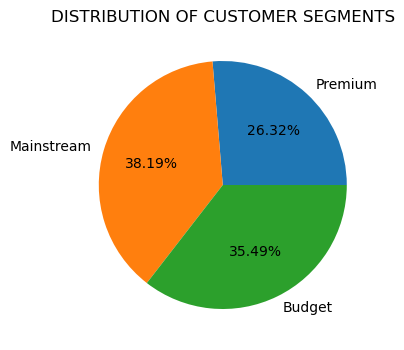

In [72]:
## To create a pie chart for customer segmentation
count = Counter(df["PREMIUM_CUSTOMER"])
## creating figure and axis
fig, ax = plt.subplots(figsize=(4,6))
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f"{p:.2f}%")
ax.set_title("DISTRIBUTION OF CUSTOMER SEGMENTS")
plt.show();

### Distribution of Premium Customers
* The mainstream customers made up 38% of total customers
* The budget customers followed closely with 35.49%
* While premium customers made up 26.32%

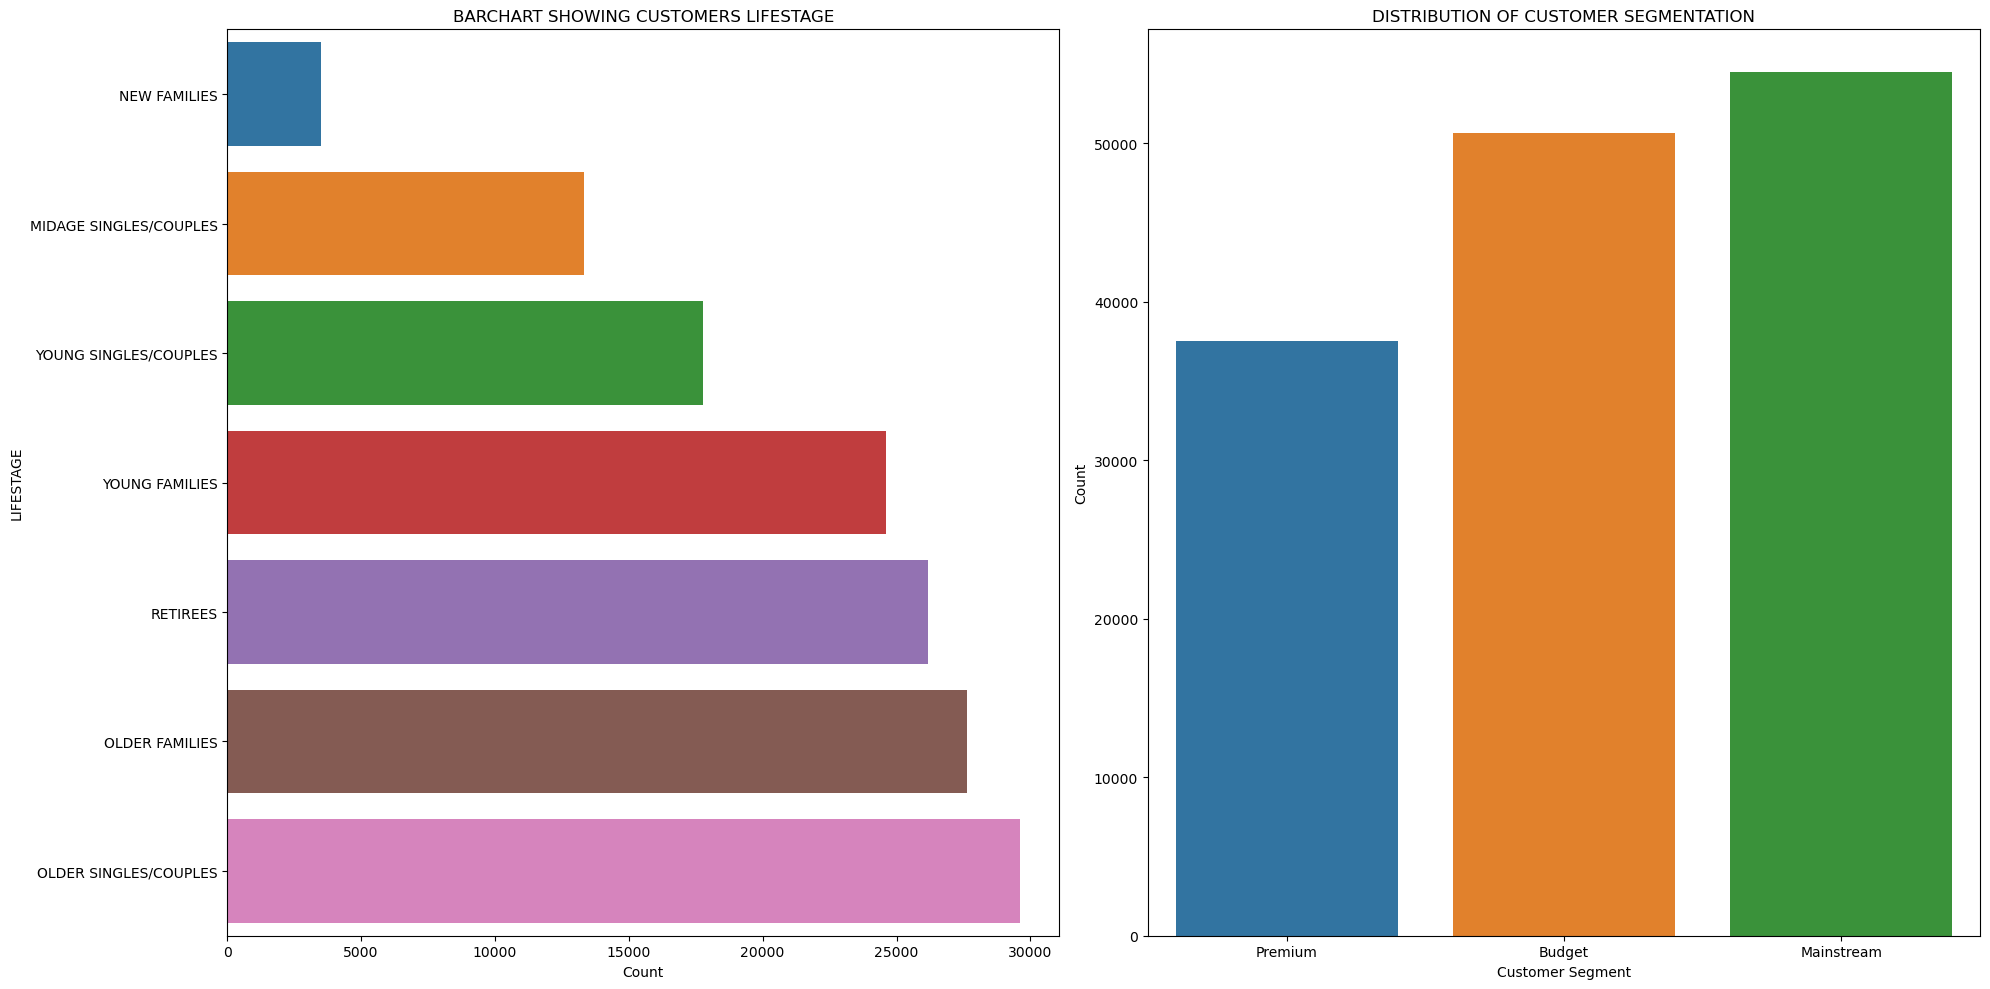

In [35]:
## to visualise categorical variables
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(20,10))
sns.countplot(y=df["LIFESTAGE"], order=df["LIFESTAGE"].value_counts(ascending=True).index, ax=axs[0])
axs[0].set_title("BARCHART SHOWING CUSTOMERS LIFESTAGE")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("LIFESTAGE")

sns.countplot(x=df["PREMIUM_CUSTOMER"], order=df["PREMIUM_CUSTOMER"].value_counts(ascending=True).index, ax=axs[1])
axs[1].set_title("DISTRIBUTION OF CUSTOMER SEGMENTATION")
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Customer Segment")

plt.tight_layout()
plt.show();

plt.savefig("BarPlot Of Categorical variables", dpi =150)

## Observation on the premium customers and lifestage of the customers
* As seen from the visualisation, OLDER SINGLES/COUPLES are the most frequent visitors to the retail store.
* Older families followed closely with over 28,000 visits to the store.
* New families were the least visitors, this could be due to inablilty of the children to have chips at early age.


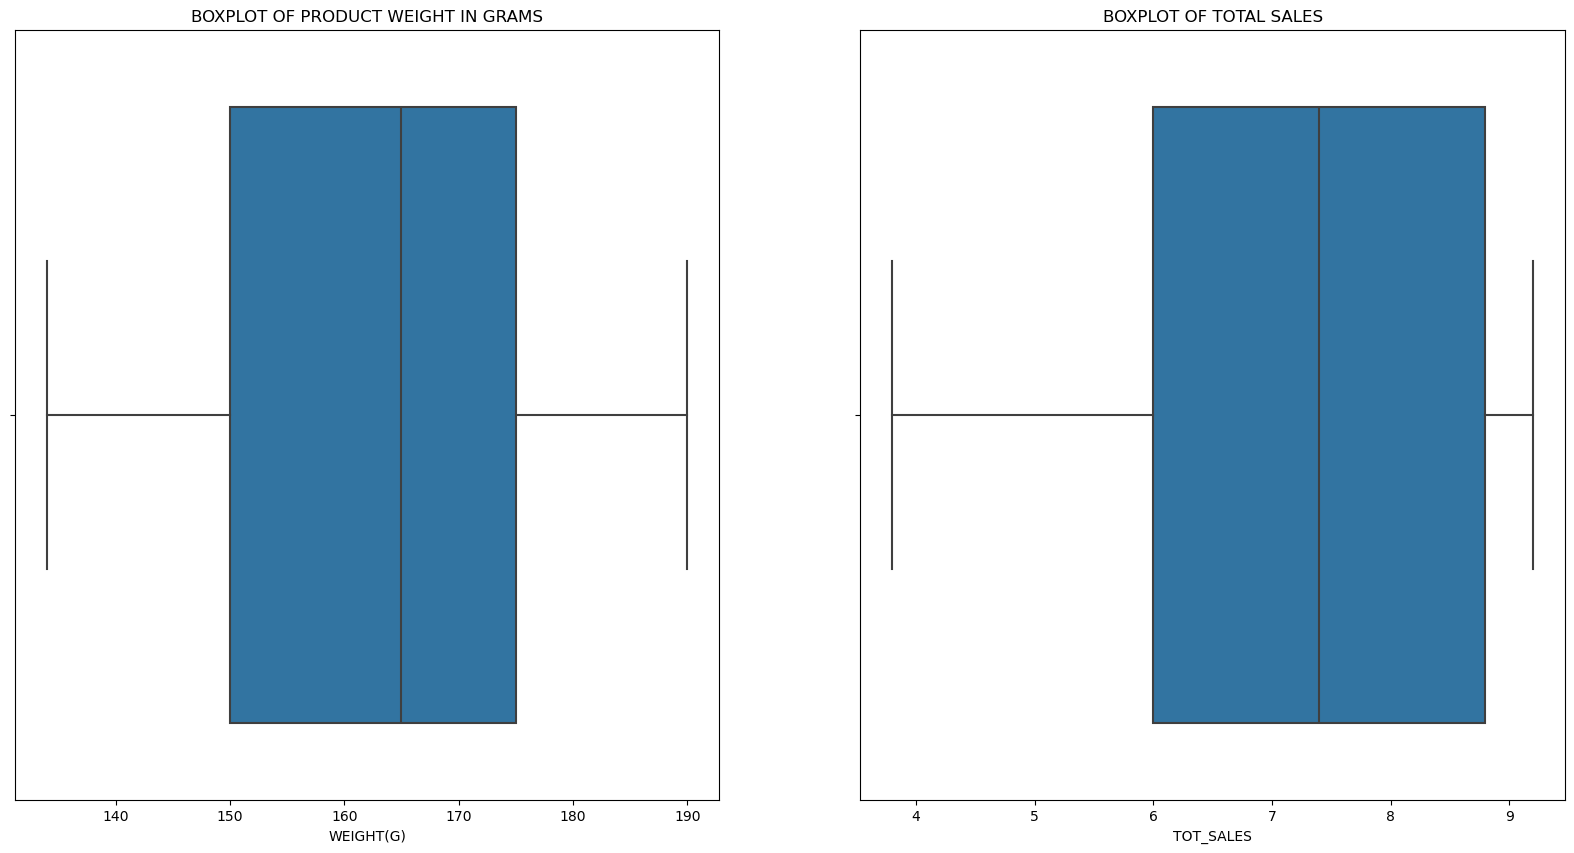

<Figure size 640x480 with 0 Axes>

In [36]:
## Building boxplots for visualisations.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.boxplot(x= "WEIGHT(G)", data = df, ax=axs[0])
axs[0].set_title("BOXPLOT OF PRODUCT WEIGHT IN GRAMS");

sns.boxplot(x="TOT_SALES", data=df, ax=axs[1])
axs[1].set_title("BOXPLOT OF TOTAL SALES");
plt.show();

# to save the images
plt.savefig("Boxplots Of numeric variables", dpi =150)

### Intepreting the boxplots
* (a) Boxplot of product weight
    * Median value of 165g
    * There are no outliers as these was dealt with in the data preprocessing stage
* (b) Boxplot of Total sales
    * Median sales value of 7.5
    * No outliers present


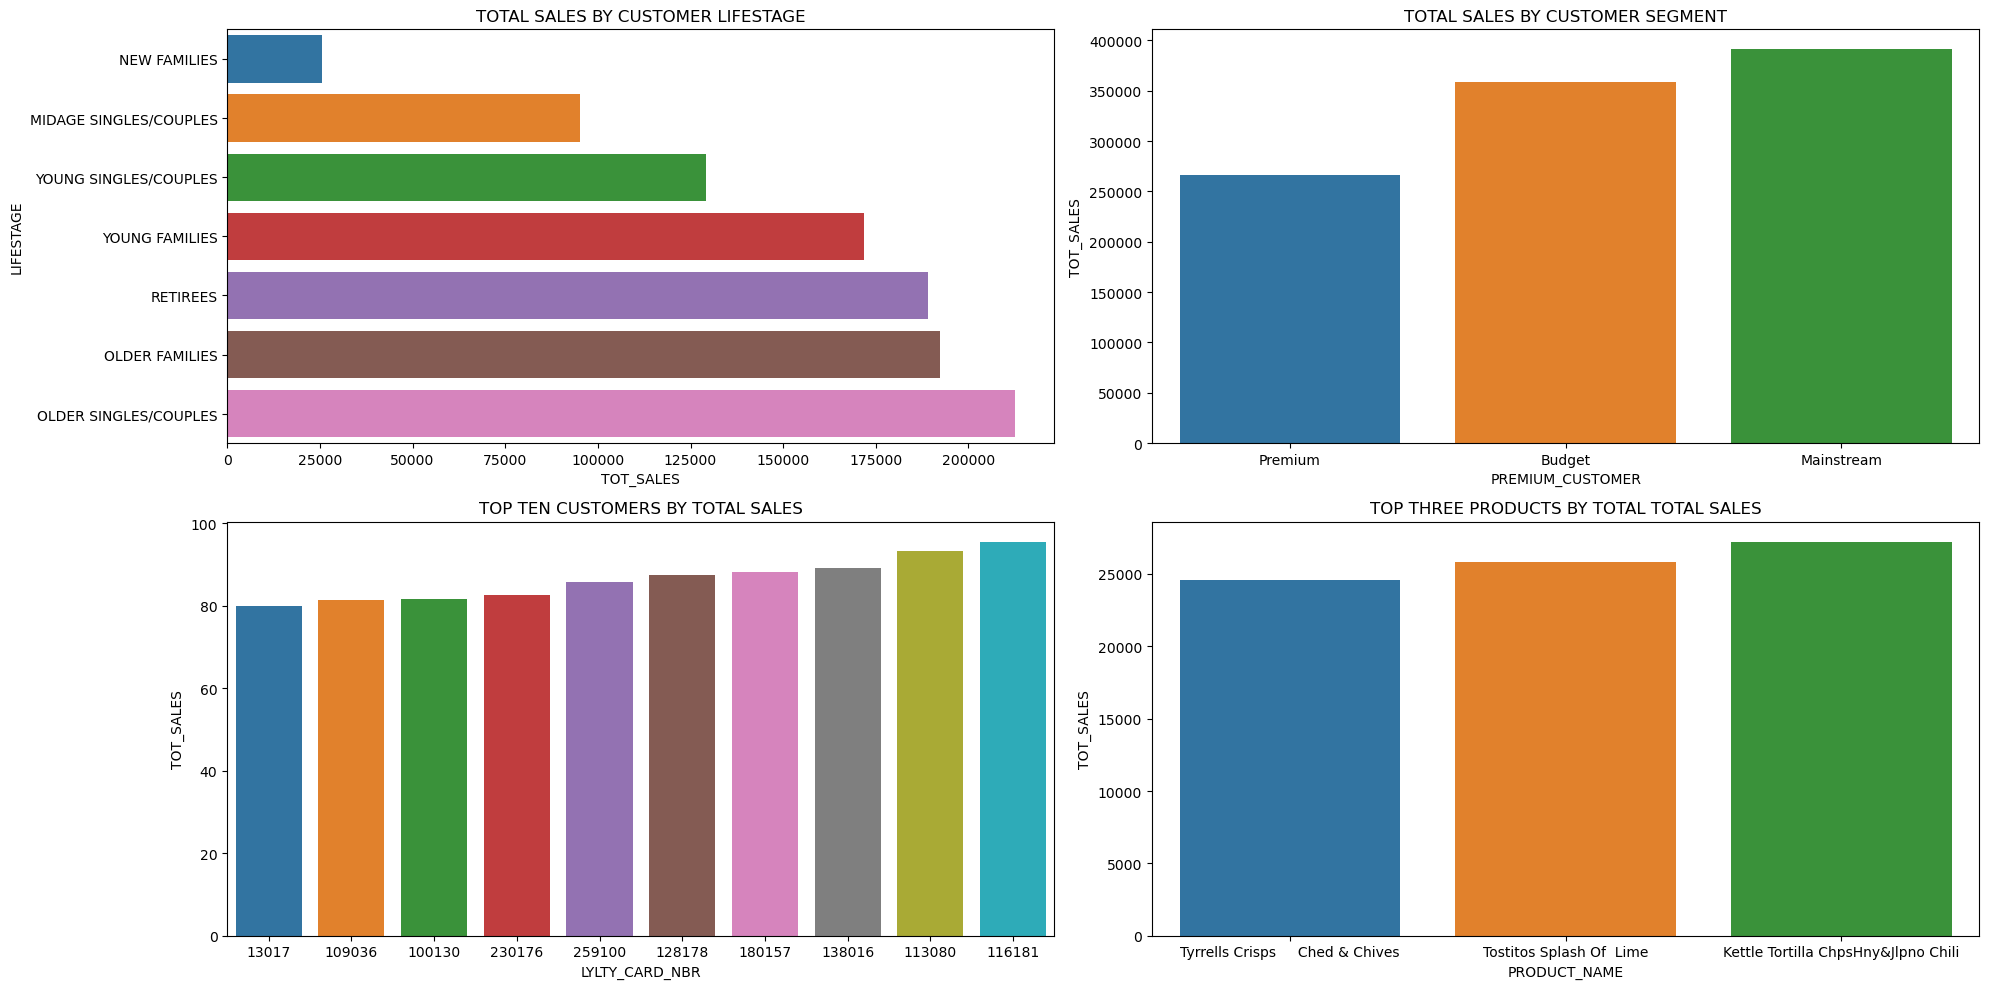

In [46]:
##BiVariate DataAnalysis
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(20,10))

## Grouping customers lifestage by total sales and in ascending order
sp_lifestage = df.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index()
sp_lifestage = sp_lifestage.sort_values(by="TOT_SALES")
## Visualise the plots
sns.barplot(y="LIFESTAGE", x= "TOT_SALES", data=sp_lifestage, ax=axs[0,0])
axs[0,0].set_title("TOTAL SALES BY CUSTOMER LIFESTAGE")

## Grouping customers type by total sales and in ascending order
cust_seg = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().reset_index()
cust_seg = cust_seg.sort_values(by="TOT_SALES")
## To visualise the plots
sns.barplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=cust_seg, ax=axs[0,1])
axs[0,1].set_title("TOTAL SALES BY CUSTOMER SEGMENT")

## Grouping top ten customers by average total sales
top_ten_counts = df["LYLTY_CARD_NBR"].value_counts().head(10).index.tolist() ## Gets the count of top 10 customers
top_ten_cust = df[df["LYLTY_CARD_NBR"].isin(top_ten_counts)] ## Filters dataframe to include only top ten customers
### to find the average total sales of products
top_ten = top_ten_cust.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index() ## Groups customers by total sales
top_ten = top_ten.sort_values(by= "TOT_SALES") ## sorts in ascending order
## TO visualise on a barplot
sns.barplot(y = "TOT_SALES", x = "LYLTY_CARD_NBR", data= top_ten, ax=axs[1,0])
axs[1,0].set_title("TOP TEN CUSTOMERS BY TOTAL SALES")


## Grouping top ten products by average total sales
top_three_count = df["PRODUCT_NAME"].value_counts().head(3).index.tolist() ## Gets the count of top 3 products
top_three_product = df[df["PRODUCT_NAME"].isin(top_three_count)] ## Filters dataframe to include only top three products
### to find the total sales of products
top_three = top_three_product.groupby("PRODUCT_NAME")["TOT_SALES"].sum().reset_index() ## Groups products by total sales
top_three = top_three.sort_values(by= "TOT_SALES") ## sorts in ascending order
## TO visualise on a barplot
sns.barplot(y = "TOT_SALES", x = "PRODUCT_NAME", data= top_three, ax=axs[1,1])
axs[1,1].set_title("TOP THREE PRODUCTS BY TOTAL TOTAL SALES")


plt.tight_layout()
plt.show();

plt.savefig("Relationship between variables", dpi =150)


## Observations from the visualisations
* (a) Bar chart showing relationship between total sales and customer lifestage
    * Older singles/couples have the highest total sales
    * New families have the least number of transaction by total sales
* (b) Total sales by customer segment
    * Mainstream customers had most sales
    * this is followed by budget customers
    * while the premium customers has least total sales
* (c) Top Ten customers
    * customer "116181" has the most purchases in the time period with over $100 in total sales
* (d) Top three products by sales
    * Kettle Tortilla chpshny & jlpno chili has most sales with over 27000 in total sales
    * Follwed closely by Tostitos splash of lime
    * Tyrrells crisps ched and chives made up the top three with just below 25000 in total sales

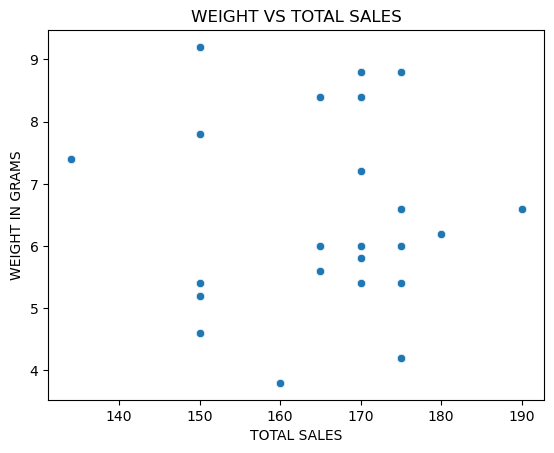

In [54]:
## Scatter plot to determinethe correlation between Product weight and total sales

sns.scatterplot(x ="WEIGHT(G)", y= "TOT_SALES", data=df)
plt.xlabel("TOTAL SALES")
plt.ylabel("WEIGHT IN GRAMS")
plt.title("WEIGHT VS TOTAL SALES")
plt.show();

plt.figsave("Scatterplot showing relationship between weight and sales")

## We established the absence of any form of relationship between product weight and total sales

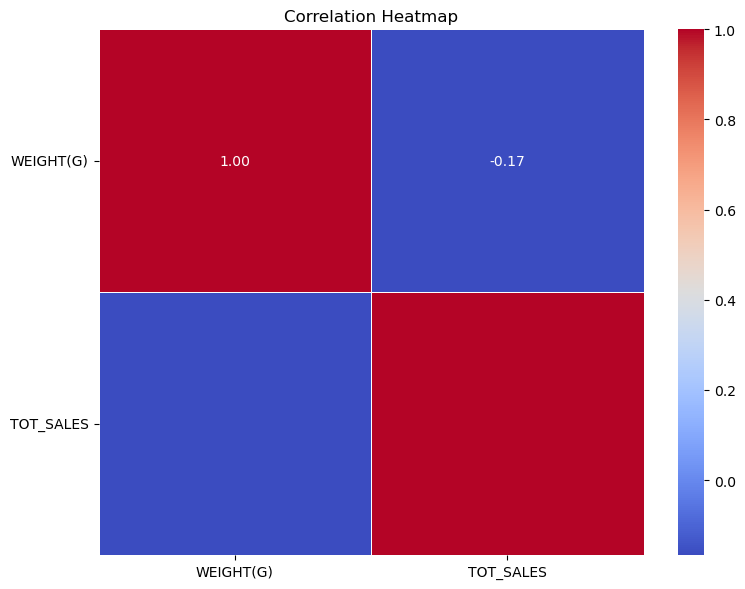

In [61]:
## To create a heatmap for the variables
plt.figure(figsize=(8,6))
cate =["WEIGHT(G)", "TOT_SALES"]
sns.heatmap(df[cate].corr(),annot = True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=0) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show();

## From the heatmap, there is no correlation between product weight and total sales.

### Insights and Recommendationns from the data available;
* Older singles/couples should be targetted to ensure they keep patronising the store
* Premium clients should be incentivised to buy more
* Promotions should be targetted towards the mainstrean customers to keep them in the companys books
* Kettle Tortilla chips remains the most sort after product, hence should always be in stock.
* Business is in safe hands as the difference between the top ten clients purchasing power is relatively narrow

In [75]:
# to save the file as csv
df.to_csv("Cleaned_quantium_data_merged", index = False)
print("File saved successfully")

File saved successfully
